In [3]:
import sys
sys.path.append("../")


import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformation : normalisation entre 0 et 1 et conversion en Tensor
transform = transforms.Compose([
    transforms.Resize((14, 14)),   # ou (21, 21)
    transforms.ToTensor()
])

# Télécharger le dataset MNIST
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)




100%|██████████| 9.91M/9.91M [00:07<00:00, 1.32MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 141kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 505kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]


In [4]:

X_train=train_dataset.data.unsqueeze(1).float()[:10000]
y_train=train_dataset.targets[:10000]
x_test=train_dataset.data.unsqueeze(1).float()[:2000]
y_test=train_dataset.targets[:2000]


In [5]:

formes = []
formes.extend([X_train[0], X_train[1], X_train[2], X_train[3], X_train[4],X_train[5],X_train[7],X_train[11],X_train[15],X_train[17]])


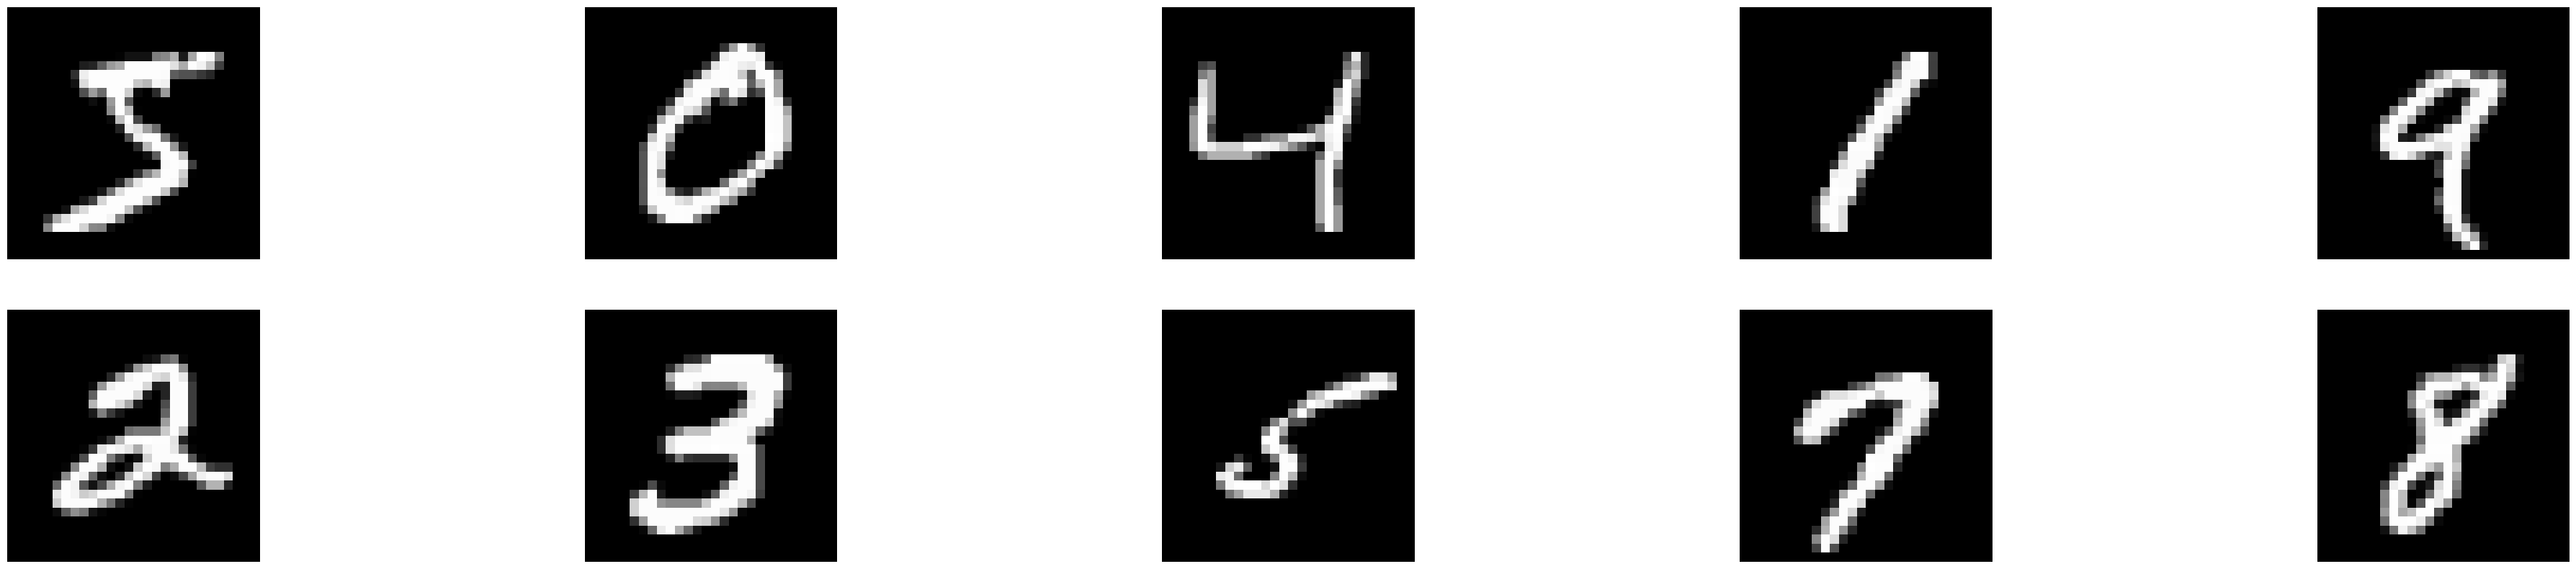

In [ ]:
import torch
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,5,figsize=(50,10))
axes=axes.flatten()
for i,f in enumerate(formes):
 img = f.squeeze(0).numpy() # (5, 5)
 axes[i].imshow(img, cmap='gray')
 axes[i].axis('off')

In [6]:
y_test=torch.eye(10)[y_test.long()]
y_train=torch.eye(10)[y_train.long()]


In [ ]:
from  core.model_structure import Deep_learning_Model
from core.MLp_layer import Layer
from utils.activations import *
import torch
from CNN.Vectorised_Cnn_operations import *
from CNN.Vectorised_Cnn_operations.Vec_cnn_Layers import *
from CNN.Loop_based_cnn.Cnn_layers import *



In [7]:
x_test.shape

torch.Size([2000, 1, 28, 28])

In [ ]:
test_model = Deep_learning_Model(
    "adam", "Crossentropy"
)

test_model.add_layers([
    # Conv 1 : 1 canal en entrée (MNIST est en niveau de gris)
    vec_Conv2D_layer(1, 16, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(16),
    LeakyRelu(0.01), 

    # Conv 2
    vec_Conv2D_layer(16, 32, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(32),
    LeakyRelu(0.01),

    # MaxPooling
    Vec_Max_pool_layer((2, 2), stride=2),  # 28x28 → 14x14

    # Conv 3
    vec_Conv2D_layer(32, 64, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(64),
    LeakyRelu(0.01),

    # MaxPooling 2
    Vec_Max_pool_layer(size=(2, 2), stride=2),  # 14x14 → 7x7

    # Flatten
    Flatten_layer(),  # 64 * 7 * 7 = 3136

    # Fully Connected 1
    Layer(64 * 7 * 7, 128, initializer="HeNormal"),
    LeakyRelu(0.01),

    # Fully Connected 2
    Layer(128, 10, initializer="HeNormal"),
])

# Entraînement
train_losses, val_losses, accs, val_accs = test_model.minibatch_SGD_train(
    25, X_train, y_train, x_test, y_test, batch_size=32, learning_rate=0.001, accuracy=True
)


1 | Train Loss: 0.3269 | Val Loss: 0.3922 | Train Acc: 12.17% | Val Acc: 18.75%
2 | Train Loss: 0.3884 | Val Loss: 0.3731 | Train Acc: 17.32% | Val Acc: 25.00%
3 | Train Loss: 0.3588 | Val Loss: 0.3379 | Train Acc: 26.47% | Val Acc: 35.50%
4 | Train Loss: 0.3237 | Val Loss: 0.2707 | Train Acc: 35.76% | Val Acc: 42.15%
5 | Train Loss: 0.2596 | Val Loss: 0.1996 | Train Acc: 42.52% | Val Acc: 51.90%
6 | Train Loss: 0.1933 | Val Loss: 0.1526 | Train Acc: 52.53% | Val Acc: 61.60%
7 | Train Loss: 0.1505 | Val Loss: 0.1380 | Train Acc: 62.33% | Val Acc: 63.25%
8 | Train Loss: 0.1375 | Val Loss: 0.1258 | Train Acc: 62.68% | Val Acc: 64.50%
9 | Train Loss: 0.1254 | Val Loss: 0.1030 | Train Acc: 64.47% | Val Acc: 71.35%
10 | Train Loss: 0.1020 | Val Loss: 0.0924 | Train Acc: 72.62% | Val Acc: 70.50%
11 | Train Loss: 0.0909 | Val Loss: 0.0851 | Train Acc: 71.59% | Val Acc: 71.45%
12 | Train Loss: 0.0837 | Val Loss: 0.0793 | Train Acc: 73.18% | Val Acc: 77.05%
13 | Train Loss: 0.0784 | Val Loss: 0

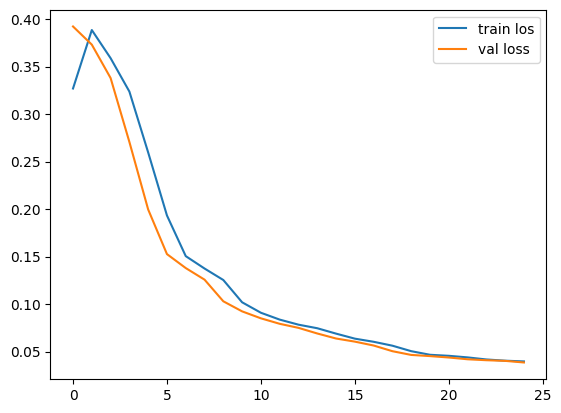

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(25),train_losses,label="train los")
plt.plot(range(25),val_losses,label="val loss")
plt.legend()
import matplotlib.pyplot as plt
plt.plot(range(25),train_losses,label="train los")
plt.plot(range(25),val_losses,label="val loss")
plt.legend()
plt.plot(range(25),accs,label="train_accuaracy")
plt.plot(range(25),val_accs,label="train_accuaracy")
plt.legend()

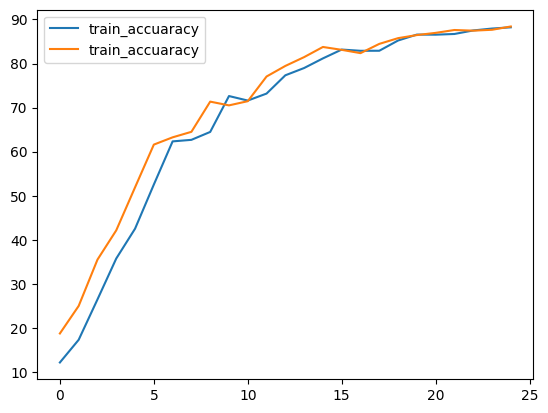

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(25),train_losses,label="train los")
plt.plot(range(25),val_losses,label="val loss")
plt.legend()
plt.plot(range(25),accs,label="train_accuaracy")
plt.plot(range(25),val_accs,label="train_accuaracy")
plt.legend()